# What drives the price of a car?

![](images/cars_v02.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

#### Answer:
<span style="color:green">_From a data perspective, our objective is to identify the crucial predictors influencing the pricing of used cars. In line with the CRISP-DM methodology, this translates into formulating a predictive modeling challenge aimed at uncovering the significant features that contribute to variations in used car prices. This involves leveraging statistical techniques and machine learning algorithms to analyze the dataset, extract meaningful patterns, and develop a predictive model that accurately estimates the price of pre-owned vehicles based on its attributes._</span>

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

#### Answer:
<span style="color:green">_To get familiar with the dataset and identify any quality issues, we will perform the following steps:
    * 1) we'll explore the data by loading it and exploring the structure of the dataset using functions like `head()`, `info()`, `describe()` among other build-in methods
    * 2) we'll examine each column individually to understand the type of data it contains
    * 3) we'll identify missing values in the dataset and determine further strategy handling missing data, such as imputation or removal, based on the nature of the missingness and its potential impact on the analysis
    * 4) we'll look into any inconsistencies, errors, or anomalies in the data (this could include duplicate records, incorrect data types, inconsistent formatting, or unexpected values)
    * 5) we'll explore relationships between different features in the dataset by utilizing visualization techniques like scatter plots, histograms, and correlation matrices
    * 6) we'll incorporate domain knowledge about the business problem and the dataset to guide our exploration
    * 7) and, finally we'll keep track of your observations, findings, and any actions taken during the data exploration process._</span>

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

#### Answer:
<span style="color:green">_Here I'd like to mention data transformations steps that will take place:
    * we'll use OneHotEncoder() and/or LabelEncoder() and/or StandardScaler() on the as-needed basis_</span>

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

#### Answer:
<span style="color:green">_We will attempt to use the following models: LinearRegression(), Ridge(), and GridSearchCV() for cross-validation and best alpha parameter search_</span>

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

#### Answer:
<span style="color:green">_After instantiating and training the models, we will evaluate our results via MSEs for training and testing data along with coefficients obtained for each feature in our dataset; coefficients will provide as a meaningful insight on which features drive the used car prices the most (effectively answering the ask of this practical application "What drives the price of a car?")_</span>

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

#### Answer:
<span style="color:green">_After completing our work we will deliver our findings via the report that will detail our insights and reccomendations to a group of used car dealers interested in fine-tuning their inventory_</span>

### Starting on Practical Application 11.1: what drives the price of a car?

...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.compose import ColumnTransformer
from sklearn.inspection import permutation_importance

import warnings
from sklearn.datasets import fetch_openml

In [2]:
insight_df = pd.read_csv('data/vehicles.csv')

... starting to analyze the data and performing pre-processing tasks as needed

In [3]:
insight_df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [4]:
insight_df.tail()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


In [5]:
insight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [6]:
insight_df.shape

(426880, 18)

In [7]:
# checking for missing values in data to determine the possibility of dropping them in order to make data cleaner
# regretfully, 'size' feature while being valuable to the analysys can not be used with 72% of data missing (306,361 out of 426,880)
insight_df.isna().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [8]:
# dropping 'size' column + dropping 'id' and 'VIN' as well as it is assumed that 'id' and 'VIN' have no relevance for the price of the car
# also, dropping 'region' since we're having two features 'region' and 'state' that contain georgaphical data ... choce is made to work with 'state' data
# and also, dropping 'model' column since it contains 11,526 .unique() values and during usage of OneHotEncoder() our features will blow up significantly presenting enourmous computaion load which is not achievable with our present resourses
# 'manufacturer' and 'state' containing 42 and 51 .unique() values respectively will also be dropped due to computational resources
insight_df = insight_df.drop(['id', 'region', 'manufacturer', 'model', 'VIN', 'size', 'state'], axis=1)

In [9]:
# confirming that there are 11 columns left, yep things look good
insight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          425675 non-null  float64
 2   condition     252776 non-null  object 
 3   cylinders     249202 non-null  object 
 4   fuel          423867 non-null  object 
 5   odometer      422480 non-null  float64
 6   title_status  418638 non-null  object 
 7   transmission  424324 non-null  object 
 8   drive         296313 non-null  object 
 9   type          334022 non-null  object 
 10  paint_color   296677 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 35.8+ MB


In [10]:
# now, we are dropping all 'NaN' values which will shrink data a bit with most impacted feates as follows 'cylinders', 'condition', 'drive', and 'paint_color'
insight_df.dropna(inplace=True)
# checking for the expected outcome and reviewing new shape
print(insight_df.shape, end='\n\n')
print(insight_df.sample(), end='\n\n')
print(insight_df.isna().sum(), end='\n\n')
insight_df.info()

(122262, 11)

        price    year condition    cylinders fuel  odometer title_status  \
109389  25990  2011.0      good  8 cylinders  gas   24122.0        clean   

       transmission drive   type paint_color  
109389        other   rwd  other        blue  

price           0
year            0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Index: 122262 entries, 31 to 426878
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         122262 non-null  int64  
 1   year          122262 non-null  float64
 2   condition     122262 non-null  object 
 3   cylinders     122262 non-null  object 
 4   fuel          122262 non-null  object 
 5   odometer      122262 non-null  float64
 6   title_status  122262 non-null  object 
 7   transmission  1222

In [12]:
# let's calculate the number of unique values for each 'object' column in our dataframe to make further data pre-processing decisions
# len(insight_df['cylinders'].unique()) ... that is a bit too manual ...

# let's loop through columns
unique_counts = {}
categorical_columns = []

for i in insight_df.columns:
    if insight_df[i].dtype == 'object':
        unique_counts[i] = len(insight_df[i].unique())
        categorical_columns.append(i)

print(unique_counts)
print(categorical_columns)

{'condition': 6, 'cylinders': 8, 'fuel': 5, 'title_status': 6, 'transmission': 3, 'drive': 3, 'type': 13, 'paint_color': 12}
['condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color']


In [13]:
# now data looks streamlined and it is likely will be used as such for further modeling
insight_df.sample()

,price,year,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
141730,6300,2009.0,excellent,6 cylinders,gas,148000.0,clean,automatic,4wd,sedan,black


In [14]:
# instantiating LabelEncoder()
label_encoder = LabelEncoder()
# applying label_encoder to each column with categorical data
for i in insight_df.columns:
    if insight_df[i].dtype == 'object':
        insight_df[i + '_encoded'] = label_encoder.fit_transform(insight_df[i])

# dropping original columns with categorical data
insight_df.drop(columns=insight_df.select_dtypes(include=['object']).columns, inplace=True)

print("original insight_df (aka 'vehicles' DataFrame) with categorical values encoded using LabelEncoder(): \n")
print(insight_df)

original insight_df (aka 'vehicles' DataFrame) with categorical values encoded using LabelEncoder(): 

        price    year  odometer  condition_encoded  cylinders_encoded  \
31      15000  2013.0  128000.0                  0                  5   
32      27990  2012.0   68696.0                  2                  6   
33      34590  2016.0   29499.0                  2                  5   
34      35000  2019.0   43000.0                  0                  5   
35      29990  2016.0   17302.0                  2                  5   
...       ...     ...       ...                ...                ...   
426860  39990  2017.0   41664.0                  2                  6   
426863  25590  2017.0   37608.0                  2                  5   
426866  32990  2016.0   55612.0                  2                  6   
426874  33590  2018.0   30814.0                  2                  5   
426878  28990  2018.0   30112.0                  2                  5   

        fuel_encoded

In [15]:
# resetting the index of the dataframe to make sure the index will not create challenges down the line
# insight_df_encoded.reset_index(drop=True, inplace=True)
# insight_df_encoded.info()
insight_df.reset_index(drop=True, inplace=True)
insight_df.info() # we now see that all our data points are numeric :-)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122262 entries, 0 to 122261
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   price                 122262 non-null  int64  
 1   year                  122262 non-null  float64
 2   odometer              122262 non-null  float64
 3   condition_encoded     122262 non-null  int32  
 4   cylinders_encoded     122262 non-null  int32  
 5   fuel_encoded          122262 non-null  int32  
 6   title_status_encoded  122262 non-null  int32  
 7   transmission_encoded  122262 non-null  int32  
 8   drive_encoded         122262 non-null  int32  
 9   type_encoded          122262 non-null  int32  
 10  paint_color_encoded   122262 non-null  int32  
dtypes: float64(2), int32(8), int64(1)
memory usage: 6.5 MB


In [16]:
# running basic correlation matrix to spot any obvious correlation between the features before building and training models 
insight_df.columns.tolist()
insight_df[insight_df.columns.tolist()].corr() # it looks like 'cylinders' (0.004441) has biggest impact on 'price'  ... let's see what model(s) will tell

,price,year,odometer,condition_encoded,cylinders_encoded,fuel_encoded,title_status_encoded,transmission_encoded,drive_encoded,type_encoded,paint_color_encoded
price,1.000000,-0.001148,0.000609,-0.001793,0.004441,-0.002547,-0.000872,-0.001298,-0.002004,0.002030,0.003068
year,-0.001148,1.000000,-0.112313,0.015006,-0.139953,0.035482,0.033328,0.089104,-0.234386,0.030523,0.026683
odometer,0.000609,-0.112313,1.000000,-0.007881,0.019628,-0.054639,-0.011118,-0.095324,-0.010659,0.009639,0.001917
condition_encoded,-0.001793,0.015006,-0.007881,1.000000,0.074287,0.037010,0.013366,0.193748,0.056060,0.043651,0.003359
cylinders_encoded,0.004441,-0.139953,0.019628,0.074287,1.000000,-0.111822,-0.073495,0.126593,0.007028,0.023759,0.025271
fuel_encoded,-0.002547,0.035482,-0.054639,0.037010,-0.111822,1.000000,0.001318,0.123199,0.028126,-0.145717,-0.078082
title_status_encoded,-0.000872,0.033328,-0.011118,0.013366,-0.073495,0.001318,1.000000,-0.063488,-0.009193,-0.002870,-0.020052
transmission_encoded,-0.001298,0.089104,-0.095324,0.193748,0.126593,0.123199,-0.063488,1.000000,0.050844,-0.007672,-0.015549
drive_encoded,-0.002004,-0.234386,-0.010659,0.056060,0.007028,0.028126,-0.009193,0.050844,1.000000,0.130195,0.073964
type_encoded,0.002030,0.030523,0.009639,0.043651,0.023759,-0.145717,-0.002870,-0.007672,0.130195,1.000000,0.076415


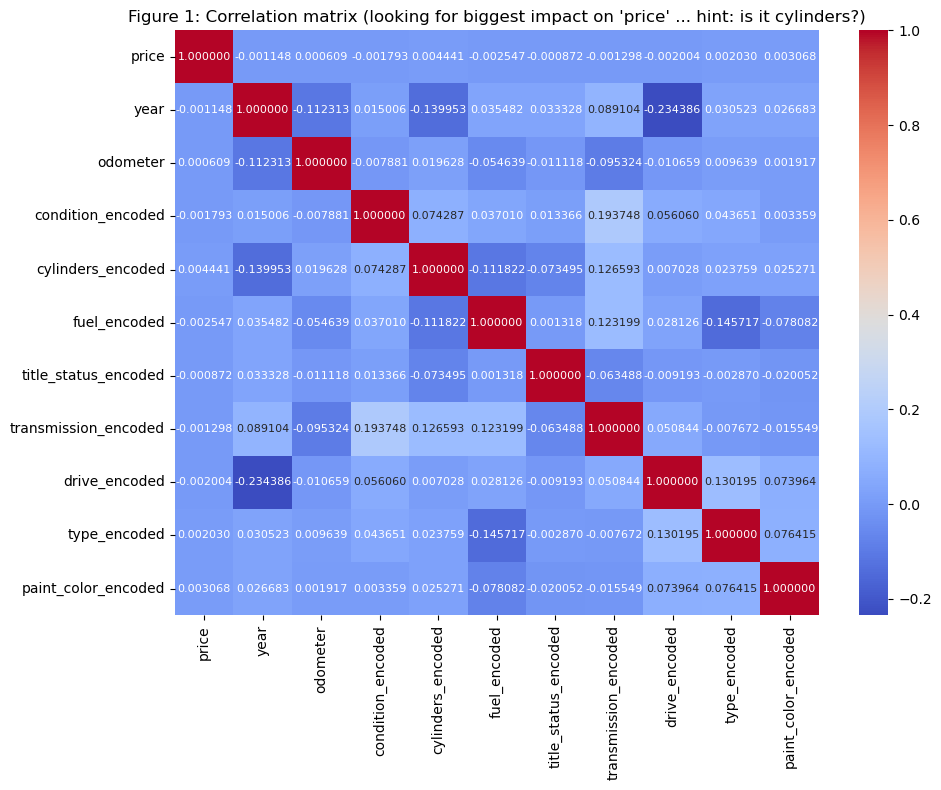

In [17]:
corr_matrix = insight_df[insight_df.columns.tolist()].corr()
# setting up the matplotlib figure
plt.figure(figsize=(10, 8))
# plotting the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".6f", annot_kws={"size": 8})
plt.title("Figure 1: Correlation matrix (looking for biggest impact on 'price' ... hint: is it cylinders?)")
plt.tight_layout()
plt.show()

In [18]:
# determining unique values of encoded cylinders feature to create visualization
insight_df['cylinders_encoded'].unique() # it appears we have 8 possible values
# print(insight_df['cylinders_encoded'])

array([5, 6, 3, 4, 0, 2, 7, 1])

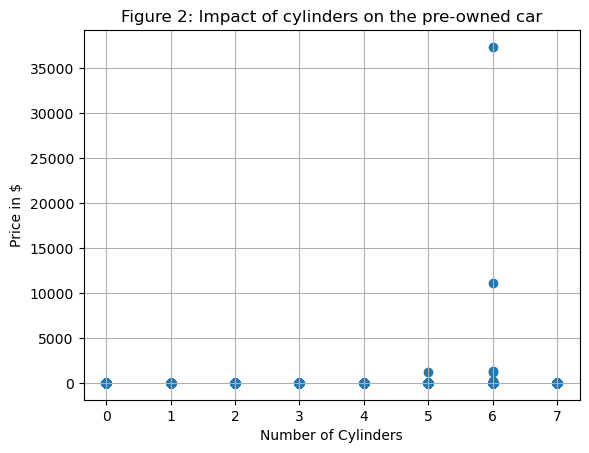

In [19]:
plt.scatter(insight_df['cylinders_encoded'], insight_df['price']/10**5)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Figure 2: Impact of cylinders on the pre-owned car')
plt.xlabel("Number of Cylinders")
plt.ylabel("Price in $")
plt.grid()

In [20]:
# scaling the data using StandardScaler(), this will simplify our Pipeline down the line
# initializing StandardScaler()
scaler = StandardScaler()
# fitting and transforming the data
scaled_data = scaler.fit_transform(insight_df)
# converting the scaled data into a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=insight_df.columns)

print("Original DataFrame: \n")
print(insight_df)

print("\n DataFrame after scaling using StandardScaler(): \n")
print(scaled_df)

Original DataFrame: 

        price    year  odometer  condition_encoded  cylinders_encoded  \
0       15000  2013.0  128000.0                  0                  5   
1       27990  2012.0   68696.0                  2                  6   
2       34590  2016.0   29499.0                  2                  5   
3       35000  2019.0   43000.0                  0                  5   
4       29990  2016.0   17302.0                  2                  5   
...       ...     ...       ...                ...                ...   
122257  39990  2017.0   41664.0                  2                  6   
122258  25590  2017.0   37608.0                  2                  5   
122259  32990  2016.0   55612.0                  2                  6   
122260  33590  2018.0   30814.0                  2                  5   
122261  28990  2018.0   30112.0                  2                  5   

        fuel_encoded  title_status_encoded  transmission_encoded  \
0                  2             

In [21]:
# creating a dataframe with only independent variables (without 'price' feature) and a series containing 'price' data (target variable)
# also splitting data for cross-validation later
X = scaled_df.drop('price', axis = 1)
y = scaled_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 71)

In [22]:
# confirming expected output

print(X_train.shape, y_train.shape)
print(' should be 80% of 122,262 - and it is! \n' )
print(X_test.shape, y_test.shape)
print(' should be 20% of 122,262 - and it is!')

(97809, 10) (97809,)
 should be 80% of 122,262 - and it is! 

(24453, 10) (24453,)
 should be 20% of 122,262 - and it is!


In [23]:
# initializing Pipeline using Ridge model
pipeline = Pipeline([('regressor', Ridge())])
pipeline

Pipeline(steps=[('regressor', Ridge())])

In [24]:
# initializing GridSearchCV() to look for the best 'alpha' parameter for Ridge model
param_grid = {'regressor__alpha': 10**np.linspace(-5, 4, 100)}
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error').fit(X_train, y_train)
grid_search

GridSearchCV(cv=5, estimator=Pipeline(steps=[('regressor', Ridge())]),
             param_grid={'regressor__alpha': array([1.00000000e-05, 1.23284674e-05, 1.51991108e-05, 1.87381742e-05,
       2.31012970e-05, 2.84803587e-05, 3.51119173e-05, 4.32876128e-05,
       5.33669923e-05, 6.57933225e-05, 8.11130831e-05, 1.00000000e-04,
       1.23284674e-04, 1.51991108e-04, 1.87381742e-04, 2.31012970e-04,
       2.84...
       8.11130831e+01, 1.00000000e+02, 1.23284674e+02, 1.51991108e+02,
       1.87381742e+02, 2.31012970e+02, 2.84803587e+02, 3.51119173e+02,
       4.32876128e+02, 5.33669923e+02, 6.57933225e+02, 8.11130831e+02,
       1.00000000e+03, 1.23284674e+03, 1.51991108e+03, 1.87381742e+03,
       2.31012970e+03, 2.84803587e+03, 3.51119173e+03, 4.32876128e+03,
       5.33669923e+03, 6.57933225e+03, 8.11130831e+03, 1.00000000e+04])},
             scoring='neg_mean_squared_error')

In [33]:
# training GridSearchCV ... ommitting this for now since we already performed training in the step above
# grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('regressor', Ridge())]),
             param_grid={'regressor__alpha': array([1.00000000e-05, 1.23284674e-05, 1.51991108e-05, 1.87381742e-05,
       2.31012970e-05, 2.84803587e-05, 3.51119173e-05, 4.32876128e-05,
       5.33669923e-05, 6.57933225e-05, 8.11130831e-05, 1.00000000e-04,
       1.23284674e-04, 1.51991108e-04, 1.87381742e-04, 2.31012970e-04,
       2.84...
       8.11130831e+01, 1.00000000e+02, 1.23284674e+02, 1.51991108e+02,
       1.87381742e+02, 2.31012970e+02, 2.84803587e+02, 3.51119173e+02,
       4.32876128e+02, 5.33669923e+02, 6.57933225e+02, 8.11130831e+02,
       1.00000000e+03, 1.23284674e+03, 1.51991108e+03, 1.87381742e+03,
       2.31012970e+03, 2.84803587e+03, 3.51119173e+03, 4.32876128e+03,
       5.33669923e+03, 6.57933225e+03, 8.11130831e+03, 1.00000000e+04])},
             scoring='neg_mean_squared_error')

In [25]:
# printing the best hyperparameters and corresponding score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Train MSE Score:", -grid_search.best_score_)

# evaluate the final model on the test set
test_score = grid_search.score(X_test, y_test)
print("Test Set MSE Score:", -test_score)

Best Hyperparameters: {'regressor__alpha': 10000.0}
Best Train MSE Score: 1.2486027802882131
Test Set MSE Score: 0.006094987607422857


In [26]:
best_pipeline = grid_search.best_estimator_
best_pipeline

Pipeline(steps=[('regressor', Ridge(alpha=10000.0))])

In [27]:
ridge_regressor = best_pipeline.named_steps['regressor']
ridge_regressor

Ridge(alpha=10000.0)

In [28]:
# obtaining coefficients from the Ridge model to determine the importance of the features
coefficients = ridge_regressor.coef_
coefficients

array([-0.00126721,  0.00035427, -0.00222071,  0.00464635, -0.00156157,
       -0.00058977, -0.00119604, -0.00266268,  0.00205791,  0.00335248])

In [29]:
# we're now arriving to the answer to our question "what drives the price of a car?" with Ridge model
coef_df_ridge = pd.DataFrame({'Feature': X.columns.tolist(), 'Coefficient': coefficients})
# coef_df
coef_df_sorted = coef_df_ridge.sort_values(by='Coefficient', ascending=False)
coef_df_sorted

,Feature,Coefficient
3,cylinders_encoded,0.004646
9,paint_color_encoded,0.003352
8,type_encoded,0.002058
1,odometer,0.000354
5,title_status_encoded,-0.000590
6,transmission_encoded,-0.001196
0,year,-0.001267
4,fuel_encoded,-0.001562
2,condition_encoded,-0.002221
7,drive_encoded,-0.002663


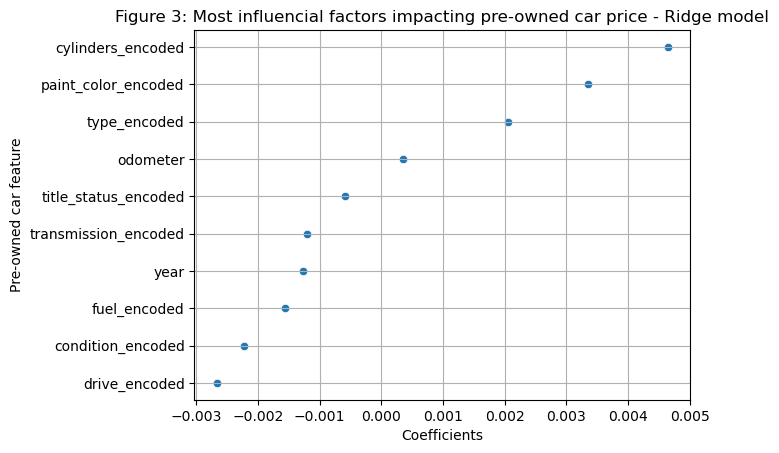

In [30]:
# plotting Ridge coefficients to visualize the impact on 'price'
sns.scatterplot(data=coef_df_sorted, x='Coefficient', y='Feature' ) # make visualization using Seaborn
plt.title("Figure 3: Most influencial factors impacting pre-owned car price - Ridge model")
plt.xlabel("Coefficients")
plt.ylabel("Pre-owned car feature")
plt.grid()
plt.show()

In [31]:
# now we will model with LinearRegression() as oppose to Ridge() above to get additional insights
# instantiating LinearRegression()
model = LinearRegression()
# fitting the model to the data splitted above
model.fit(X_train, y_train)
# making predictions ... 
predictions = model.predict(X)

# printing the coefficients and intercept
print("Coefficients:", model.coef_)  # slope(s) of the linear model
print("Intercept:", model.intercept_)  # intercept of the linear model

# printing the predictions
print("Predictions:", predictions)

Coefficients: [-0.00141574  0.00034561 -0.00245164  0.00511705 -0.00157492 -0.00060978
 -0.00129471 -0.0030089   0.0022881   0.0036947 ]
Intercept: 0.0008286590474870755
Predictions: [-0.00258682 -0.00042532  0.00326422 ... -0.00503744  0.00099077
 -0.00021197]


In [32]:
# we're now arriving to the answer to our question "what drives the price of a car?" with LinearRegression
coef_df_linear = pd.DataFrame({'Feature': X.columns.tolist(), 'Coefficient': model.coef_})
# coef_df
coef_df_sorted_linear = coef_df_linear.sort_values(by='Coefficient', ascending=False)
coef_df_sorted_linear

,Feature,Coefficient
3,cylinders_encoded,0.005117
9,paint_color_encoded,0.003695
8,type_encoded,0.002288
1,odometer,0.000346
5,title_status_encoded,-0.000610
6,transmission_encoded,-0.001295
0,year,-0.001416
4,fuel_encoded,-0.001575
2,condition_encoded,-0.002452
7,drive_encoded,-0.003009


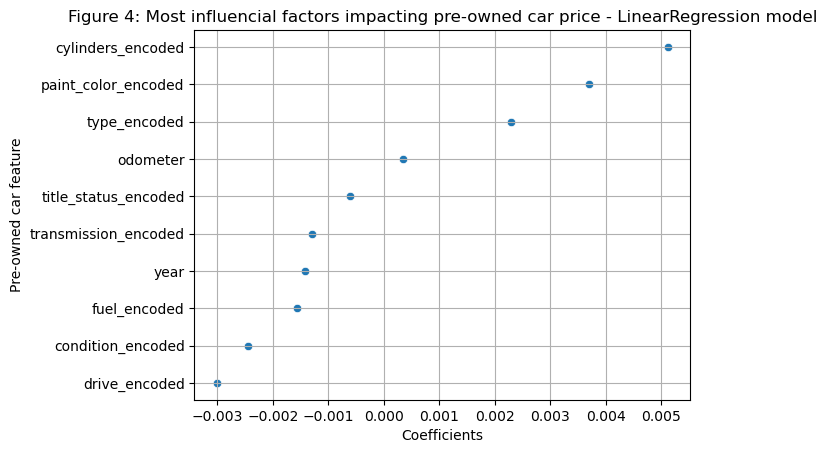

In [33]:
# plotting LinearRegression coefficients to visualize the impact on 'price'
sns.scatterplot(data=coef_df_sorted_linear, x='Coefficient', y='Feature' ) # make visualization using Seaborn
plt.title("Figure 4: Most influencial factors impacting pre-owned car price - LinearRegression model")
plt.xlabel("Coefficients")
plt.ylabel("Pre-owned car feature")
plt.grid()
plt.show()

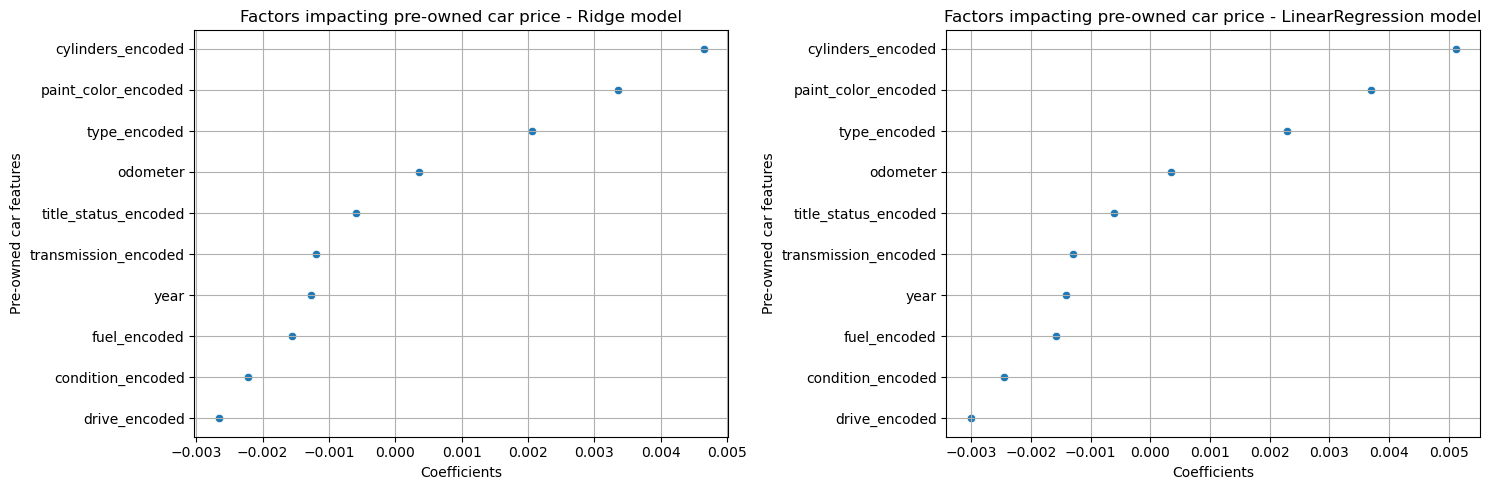

In [36]:
# side-by-side subplots note 'cylinders' plotting of Ridge coefficient 0.004646 vs. LinearRegression coefficient 0.005117
fig, axes = plt.subplots(1, 2, figsize=(15, 5))


# scatter plot for Ridge model
sns.scatterplot(data=coef_df_sorted, x='Coefficient', y='Feature', ax=axes[0])
axes[0].set_title("Factors impacting pre-owned car price - Ridge model")
axes[0].set_xlabel("Coefficients")
axes[0].set_ylabel("Pre-owned car features")
axes[0].grid(True)

# scatter plot for LinearRegression model
sns.scatterplot(data=coef_df_sorted_linear, x='Coefficient', y='Feature', ax=axes[1])
axes[1].set_title("Factors impacting pre-owned car price - LinearRegression model")
axes[1].set_xlabel("Coefficients")
axes[1].set_ylabel("Pre-owned car features")
axes[1].grid(True)

# adjusting layout
plt.tight_layout()

# showing the plot
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

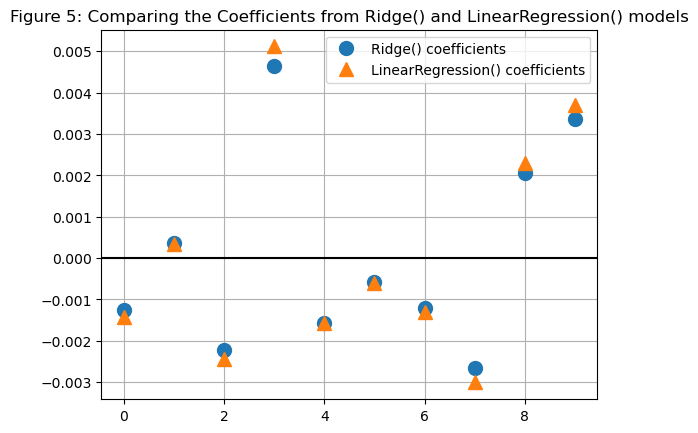

In [35]:
# side-by-side comparizon of coefficients from Ridge() and LinearRegression() models
plt.plot(ridge_regressor.coef_, 'o', markersize = 10, label = 'Ridge() coefficients')
plt.plot(model.coef_, '^', markersize = 10, label = 'LinearRegression() coefficients')
plt.legend()
plt.axhline(color = 'black')
plt.grid()
plt.title('Figure 5: Comparing the Coefficients from Ridge() and LinearRegression() models')
plt.show